In [1]:
#importing libraries that needed.
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#import files data
Raw = pd.read_csv("train.csv") #data shape 3362796 x 8
test_raw = pd.read_csv("test.csv")
submit=pd.read_csv("submission.csv")

In [3]:
#data cleaning 
#1.NaN data finding
Raw.isnull()  #Installments have lots of NaN

store_id   date   time  card_id  amount  installments  days_of_week  \
0           False  False  False    False   False          True         False   
1           False  False  False    False   False          True         False   
2           False  False  False    False   False          True         False   
3           False  False  False    False   False          True         False   
4           False  False  False    False   False          True         False   
...           ...    ...    ...      ...     ...           ...           ...   
3362791     False  False  False    False   False          True         False   
3362792     False  False  False    False   False          True         False   
3362793     False  False  False    False   False          True         False   
3362794     False  False  False    False   False          True         False   
3362795     False  False  False    False   False          True         False   

         holyday  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
3362791    False  
3362792    False  
3362793    False  
3362794    False  
3362795    False  

[3362796 rows x 8 columns]

In [4]:
#2.Fill NaN data with 0
Raw = Raw.fillna(0)
print(Raw)

         store_id        date      time     card_id  amount  installments  \
0               0  2016-12-14  18:05:31  d297bba73f       5           0.0   
1               0  2016-12-14  18:05:54  d297bba73f      -5           0.0   
2               0  2016-12-19  12:42:31  0880849c05     144           0.0   
3               0  2016-12-19  12:48:08  8b4f9e0e95      66           0.0   
4               0  2016-12-19  13:31:08  7ad237eed0      24           0.0   
...           ...         ...       ...         ...     ...           ...   
3362791      1799  2018-07-19  17:58:31  e254bf70d9     600           0.0   
3362792      1799  2018-07-19  18:54:34  8f41c89891     275           0.0   
3362793      1799  2018-07-22  14:46:57  aeb64fe1fb     350           0.0   
3362794      1799  2018-07-25  18:09:13  57932602d6     300           0.0   
3362795      1799  2018-07-30  10:58:53  42d354807a     325           0.0   

         days_of_week  holyday  
0                   2        0  
1        

In [5]:
#3.Store store_id data for slicing data for each cases
id = Raw['store_id'].unique()
print(id)

[   0    1    2 ... 1797 1798 1799]


In [6]:
#store_id별로 데이터 나누는 함수
def sortid(id):
    case = Raw.store_id ==id #bool 형식으로 데이터 나누기
    store_sales = Raw[case]
    return store_sales
sales = sortid(0)
print(sales)

       store_id        date      time     card_id  amount  installments  \
0             0  2016-12-14  18:05:31  d297bba73f       5           0.0   
1             0  2016-12-14  18:05:54  d297bba73f      -5           0.0   
2             0  2016-12-19  12:42:31  0880849c05     144           0.0   
3             0  2016-12-19  12:48:08  8b4f9e0e95      66           0.0   
4             0  2016-12-19  13:31:08  7ad237eed0      24           0.0   
...         ...         ...       ...         ...     ...           ...   
68768         0  2018-07-31  23:12:44  b07b89c873      74           0.0   
68769         0  2018-07-31  23:16:50  8d4822aa74      97           0.0   
68770         0  2018-07-31  23:40:24  f985e806d7      49           0.0   
68771         0  2018-07-31  23:55:10  2748138407      29           0.0   
68772         0  2018-07-31  23:56:14  de21ab0098      13           0.0   

       days_of_week  holyday  
0                 2        0  
1                 2        0  
2     

In [7]:
#4.Transforming Dataframe sturcture
print(sales.dtypes)#checking the data types
sales['payment_time']=sales.loc[:,'date']+ ' ' +sales.loc[:,'time'] 
period = sales['date'].unique()
sales['payment_time']=pd.to_datetime(sales['payment_time'])
print(sales.dtypes)#checking the data types to check 
train_batch= sales.set_index('payment_time') #changing index
train_batch = train_batch.loc[:,('amount')]
print(train_batch)

store_id          int64
date             object
time             object
card_id          object
amount            int64
installments    float64
days_of_week      int64
holyday           int64
dtype: object
store_id                 int64
date                    object
time                    object
card_id                 object
amount                   int64
installments           float64
days_of_week             int64
holyday                  int64
payment_time    datetime64[ns]
dtype: object
payment_time
2016-12-14 18:05:31      5
2016-12-14 18:05:54     -5
2016-12-19 12:42:31    144
2016-12-19 12:48:08     66
2016-12-19 13:31:08     24
                      ... 
2018-07-31 23:12:44     74
2018-07-31 23:16:50     97
2018-07-31 23:40:24     49
2018-07-31 23:55:10     29
2018-07-31 23:56:14     13
Name: amount, Length: 68773, dtype: int64


Text(0, 0.5, 'Amount of Sales')

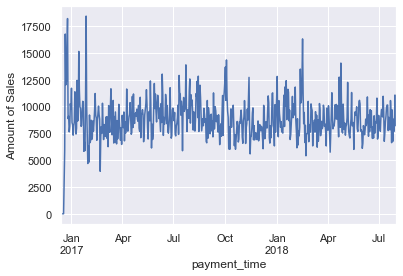

In [8]:
#Seeing the data for some standards
daily = train_batch.resample('D').sum()
daily.plot()
plt.ylabel("Amount of Sales") #See example of data plot of daily sales.

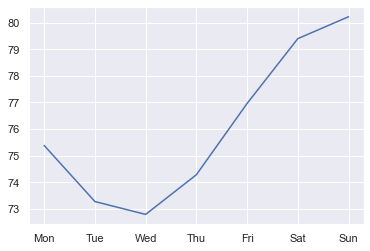

In [9]:
#See example of mean of sales for each day of the week.
weekday=train_batch.groupby(train_batch.index.dayofweek).mean()
weekday.index= ['Mon', 'Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']
weekday.plot()

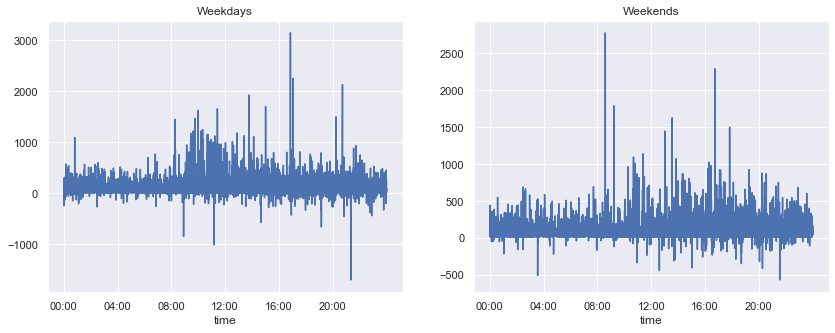

In [10]:
#See each times sales of weeekdays and weekends
happy_day= np.where(train_batch.index.weekday < 5, 'Weekday', 'Weekend')
by_time = train_batch.groupby([happy_day, train_batch.index.time]).mean()
fig, ax = plt.subplots(1,2, figsize=(14,5))
hourly_ticks= 4*60*60*np.arange(6)
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',xticks=hourly_ticks)
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',xticks=hourly_ticks)

In [11]:
train_batch = train_batch.resample('d').sum()
print(train_batch)

payment_time
2016-12-14        0
2016-12-15        0
2016-12-16        0
2016-12-17        0
2016-12-18        0
              ...  
2018-07-27     7668
2018-07-28     8404
2018-07-29    11067
2018-07-30     8210
2018-07-31     9116
Freq: D, Name: amount, Length: 595, dtype: int64


In [12]:
days = ['Mon', 'Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']
train_batch = train_batch.to_frame()
total_period=pd.date_range(period[0], period[-1])
weekday_produce =pd.DataFrame({'date': total_period})
for i in range(7):
    train_batch[days[i]]= (weekday_produce['date'].dt.dayofweek ==i).astype(int).values
print(train_batch)


              amount  Mon  Tue  Wed  Thu  Fri  Sat  Sun
payment_time                                           
2016-12-14         0    0    0    1    0    0    0    0
2016-12-15         0    0    0    0    1    0    0    0
2016-12-16         0    0    0    0    0    1    0    0
2016-12-17         0    0    0    0    0    0    1    0
2016-12-18         0    0    0    0    0    0    0    1
...              ...  ...  ...  ...  ...  ...  ...  ...
2018-07-27      7668    0    0    0    0    1    0    0
2018-07-28      8404    0    0    0    0    0    1    0
2018-07-29     11067    0    0    0    0    0    0    1
2018-07-30      8210    1    0    0    0    0    0    0
2018-07-31      9116    0    1    0    0    0    0    0

[595 rows x 8 columns]


In [13]:
x_train = train_batch[days]
y_train = train_batch['amount']
model = LinearRegression(fit_intercept = False)
model.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [14]:
def transform(sales):
    sales['payment_time']=sales.loc[:,'date']+ ' ' +sales.loc[:,'time'] 
    period = sales['date'].unique()
    sales['payment_time']=pd.to_datetime(sales['payment_time'])
    train_batch= sales.set_index('payment_time') #changing index
    train_batch = train_batch.loc[:,('amount')]
    train_batch = train_batch.resample('d').sum()
    days = ['Mon', 'Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']
    train_batch = train_batch.to_frame()
    total_period=pd.date_range(period[0], period[-1])
    weekday_produce =pd.DataFrame({'date': total_period})
    for i in range(7):
        train_batch[days[i]]= (weekday_produce['date'].dt.dayofweek ==i).astype(int).values
    return train_batch

In [ ]:
for i in id:
    sales= sortid(i)
    train_batch = transform(sales)
    x_train = train_batch[days]
    y_train = train_batch['amount']
    model = LinearRegression(fit_intercept = False)
    model.fit(x_train, y_train)

In [ ]:
test_raw = test_raw.fillna(0)
test_id = test_raw['store_id'].unique()
result= []
for i in test_id:
    case = test_raw.store_id == i #bool 형식으로 데이터 나누기
    store_sales = test_raw[case]
    period = store_sales['date'].unique()
    total_period=pd.date_range(period[-1],periods= 100)
    test_batch =pd.DataFrame({'date': total_period, 'amount' : 0})
    for i in range(7):
        test_batch[days[i]]= (test_batch['date'].dt.dayofweek ==i).astype(int).values
    test_batch= test_batch.set_index('date') #changing index
    test_batch = test_batch[days]
   
    result.append(model.predict(test_batch).sum())
submit['total_sales']= result
print(submit)
submit['total_sales'].astype(int)

In [ ]:
submit.to_csv('submission.csv', index = False)